In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# PH01-00

In [2]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)


In [3]:
# calculate correlation
df[np.array(df.columns)].corr()
# cols = ['happiness_score', 'gdp_per_capita','social_support', 'life_expectancy', 'freedom', 'generosity','perceptions_of_corruption']
# happiness21[cols].corr()

,Unnamed: 0,flowrate,total flow,pressure,pressure voltage,flowrate sampled,pv sampled,calculated pressure,pressure difference,average difference,pressure + average difference,new pressure difference,average new pressure difference
Unnamed: 0,1.000000,-0.021197,0.997998,-0.003079,-0.003087,-0.021159,-0.003146,-0.006232,0.015069,NaN,-0.006232,0.015069,NaN
flowrate,-0.021197,1.000000,-0.018394,0.968607,0.956084,0.988210,0.958929,0.961346,0.554959,NaN,0.961346,0.554959,NaN
total flow,0.997998,-0.018394,1.000000,-0.001313,-0.001376,-0.018369,-0.001402,-0.004242,0.014821,NaN,-0.004242,0.014821,NaN
pressure,-0.003079,0.968607,-0.001313,1.000000,0.986366,0.963250,0.988081,0.988425,0.594560,NaN,0.988425,0.594560,NaN
pressure voltage,-0.003087,0.956084,-0.001376,0.986366,1.000000,0.951606,0.981219,0.979559,0.562016,NaN,0.979559,0.562016,NaN
flowrate sampled,-0.021159,0.988210,-0.018369,0.963250,0.951606,1.000000,0.963654,0.965984,0.499131,NaN,0.965984,0.499131,NaN
pv sampled,-0.003146,0.958929,-0.001402,0.988081,0.981219,0.963654,1.000000,0.998308,0.472657,NaN,0.998308,0.472657,NaN
calculated pressure,-0.006232,0.961346,-0.004242,0.988425,0.979559,0.965984,0.998308,1.000000,0.465694,NaN,1.000000,0.465694,NaN
pressure difference,0.015069,0.554959,0.014821,0.594560,0.562016,0.499131,0.472657,0.465694,1.000000,NaN,0.465694,1.000000,NaN
average difference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Score:  0.9717103919987965
Error:  0.1825699066317222


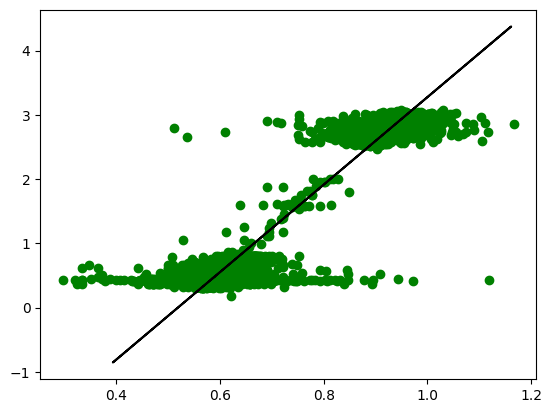

Input: pressure voltage
Predicted: pressure


In [4]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: pressure")




Score:  0.9094190742432587
Error:  1.107703349426084


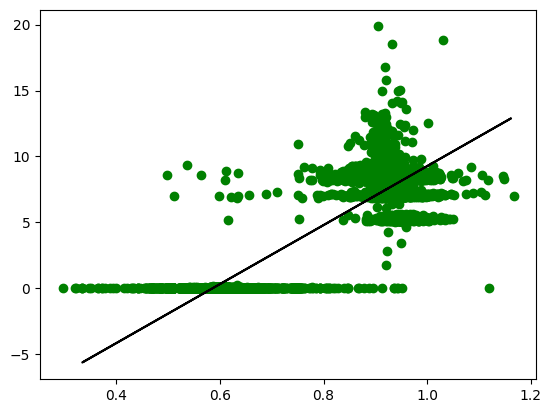

Input: pressure voltage
Predicted: flowrate


In [3]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
# plt.plot(y_train)
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9349257715675866
Error:  0.9378582598880479


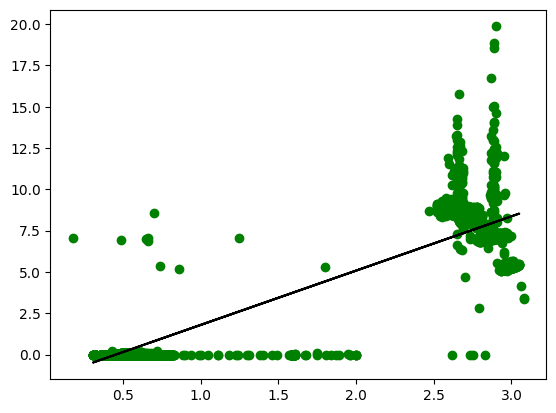

Input: pressure
Predicted: flowrate


In [3]:
df_binary = df[['flowrate', 'pressure']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure")
print("Predicted: flowrate")

   flowrate sampled  pv sampled
0               0.0    0.598931
1               0.0    0.598931
2               0.0    0.598931
3               0.0    0.598931
4               0.0    0.598931
    flowrate sampled  pv sampled
0                0.0    0.598931
5                0.0    0.605054
10               0.0    0.612144
15               0.0    0.606020
20               0.0    0.598770
Score:  0.9120353177153606
Error:  1.0982973284772255


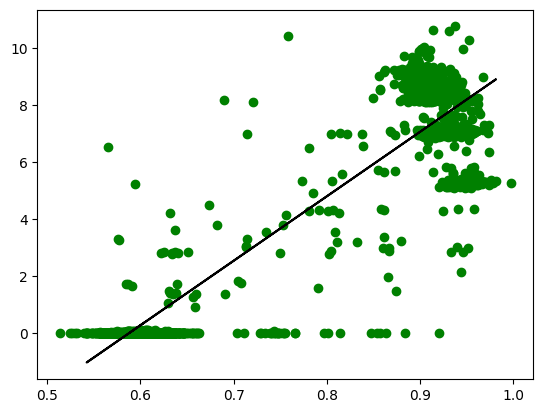

Input: sampled pressure voltage
Predicted: sampled flowrate


In [7]:
df_binary = df[['flowrate sampled', 'pv sampled']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pv sampled']).reshape(-1, 1)
y = np.array(df_binary['flowrate sampled']).reshape(-1, 1)

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# Logistic, Ridge, Lasso Regression

Score:  0.9466624128405392
Error:  52.3411648538193


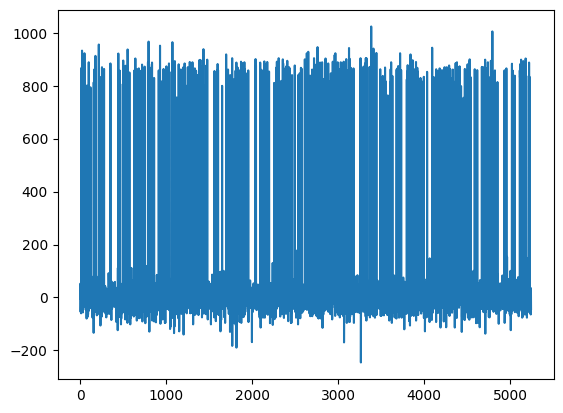

Input: pressure voltage
Predicted: flowrate


In [27]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
y = (y*100).astype(int)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

# regr = LogisticRegression()
regr = Ridge(alpha=1e-15)
# regr = Lasso(alpha=0.1)
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
# plt.scatter(X_test, y_test,color='g') 
plt.plot(y_pred) 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

In [28]:
print(y_pred)

[[ 19.27945959]
 [ 31.36857203]
 [ 51.15150011]
 ...
 [ 26.97327523]
 [  9.38799556]
 [-43.36647931]]


In [6]:
# IMPORT Knn and K-means from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score:  0.001519756838905775


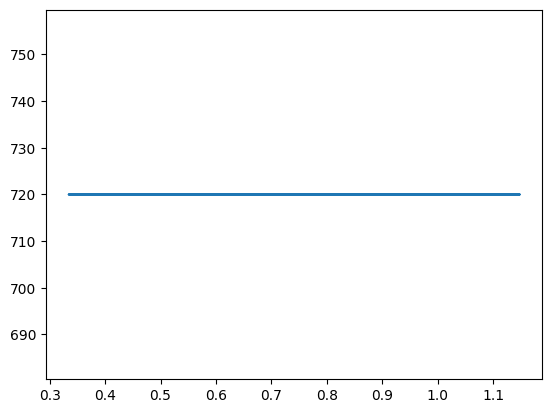

In [14]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
y = (y*100).astype(int)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Splitting the data into training and testing data

# KNN and K-means clustering

# elbow method to find optimal k
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X_train)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title("The Elbow Method Graph")

#  optimal k = 2
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=42)
X_train = X_train*1000000
X_train_new = kmeans.fit_predict(X_train)
X_train_new = X_train_new/1000000

# elbow method to find optimal k
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(y_train)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title("The Elbow Method Graph")

#  optimal k = 2
# kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
# y_train_new = kmeans.fit_predict(y_train)
# y_train_new = y_train_new/100

# plt.scatter(X_train_new, y_train_new,color='g')

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
X_train_new = X_train_new.reshape(-1, 1)
knn.fit(X_train_new, y_train)
y_pred = knn.predict(X_test)
print("Score: ", knn.score(X_test, y_test))

plt.plot(X_test,y_pred)

# PH03-00

In [9]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0300(2).xlsx')

Score:  0.22034149030851313
Error:  0.4792069705621027


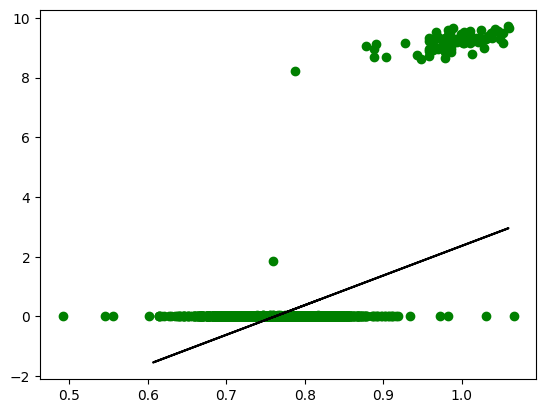

Input: pressure voltage
Predicted: flowrate


In [10]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.563921682350176
Error:  0.4028834590938817


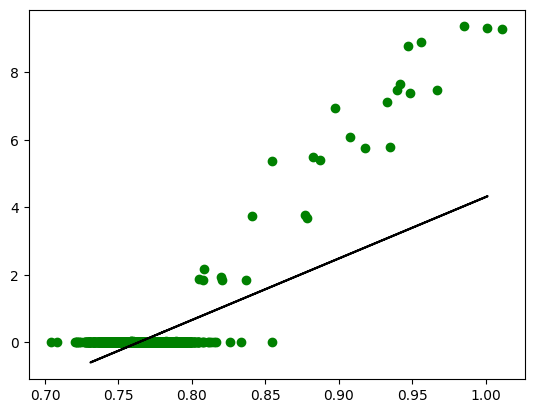

Input: sampled pressure voltage
Predicted: sampled flowrate


In [11]:
df_binary = df[['flowrate', 'pressure voltage']]
# print(df_binary.head())
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
# print(df_test.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# Logistic, Ridge, Lasso Regression

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  0.9899396378269618
Error:  55.842484054931504


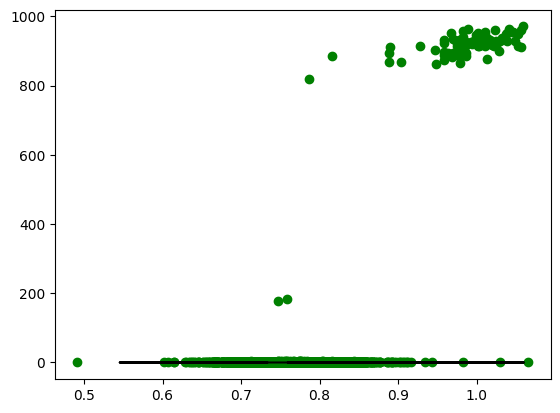

Input: pressure voltage
Predicted: flowrate


In [12]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
y = (y*100).astype(int)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

regr = LogisticRegression()
# regr = Ridge(alpha=1e-15)
# regr = Lasso(alpha=0.1)
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

# PH03-01
# NO FLOWRATE DATA DUE TO FAULTY METER

In [13]:
# # df = pd.read_csv('ph0100.xlsx')
# #read the data from the excel file
# df = pd.read_excel('ph0301(2).xlsx')
# df_binary = df[['pressure', 'pressure voltage']]
# df_binary = df_binary.sample(frac=1)
# df_binary.head()
# X = np.array(df_binary['pressure']).reshape(-1, 1)
# y = np.array(df_binary['pressure voltage']).reshape(-1, 1)
  
# # since each dataframe contains only one column
# df_binary.dropna(inplace = True)
  
# # Dropping any rows with Nan values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# # Splitting the data into training and testing data
# regr = LinearRegression()
# regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
# y_pred = regr.predict(X_test)
# plt.scatter(X_train, y_train,color='g') 
# plt.plot(X_test, y_pred,color='k') 
# plt.show()

# PH03-02

In [14]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0302(2).xlsx')

Score:  0.7975642203276077
Error:  0.9530837520944446


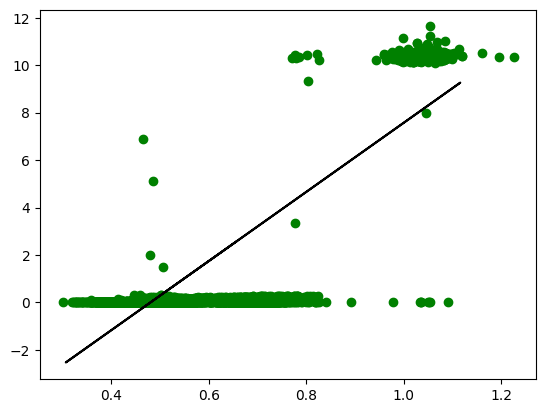

Input: pressure voltage
Predicted: flowrate


In [15]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.8173448344872886
Error:  0.7817520078951317


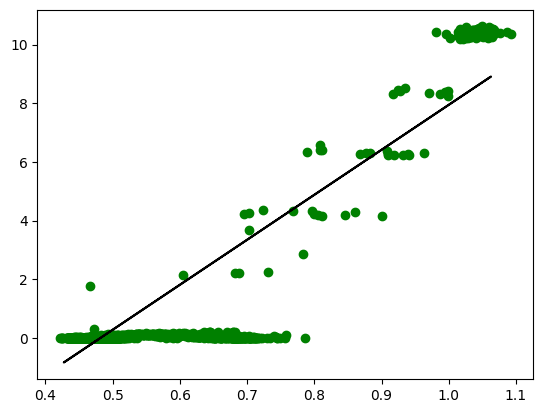

Input: sampled pressure voltage
Predicted: sampled flowrate


In [16]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# Logistic, Ridge, Lasso, ElasticNet, SdgRegressor Regression

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.891e+07, tolerance: 8.734e+04
  model = cd_fast.enet_coordinate_descent(


Score:  0.7882114467292087
Error:  92.71394465301967


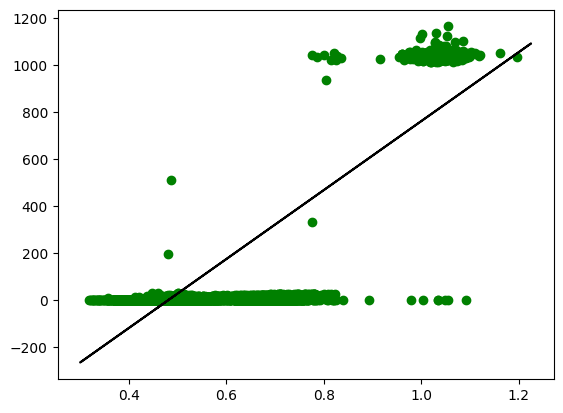

Input: pressure voltage
Predicted: flowrate


In [17]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
y = (y*100).astype(int)
# column vector to 1-d array
# y = y.ravel()
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data


# regr = LogisticRegression()
# regr = Ridge(alpha=1e-15)
regr = Lasso(alpha=1e-15)
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

# PH03-03

In [18]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0303(2).xlsx')

Score:  0.9686617675011565
Error:  0.41482113746835814


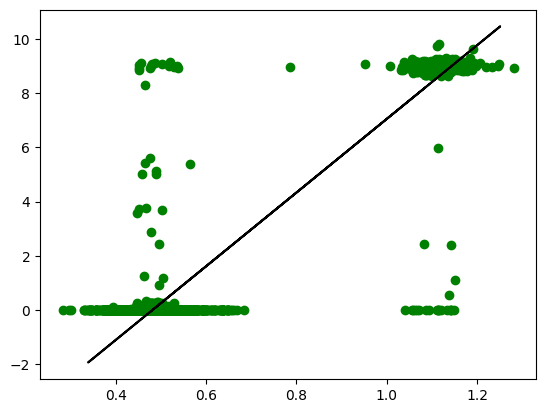

Input: pressure voltage
Predicted: flowrate


In [19]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9860454501676795
Error:  0.24392425623897745


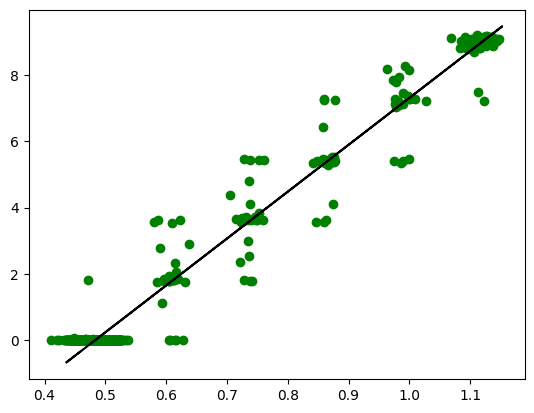

Input: sampled pressure voltage
Predicted: sampled flowrate


In [20]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# Logistic, Ridge, Lasso Regression

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e+07, tolerance: 1.026e+05
  model = cd_fast.enet_coordinate_descent(


Score:  0.9591605567552479
Error:  47.026004945980475


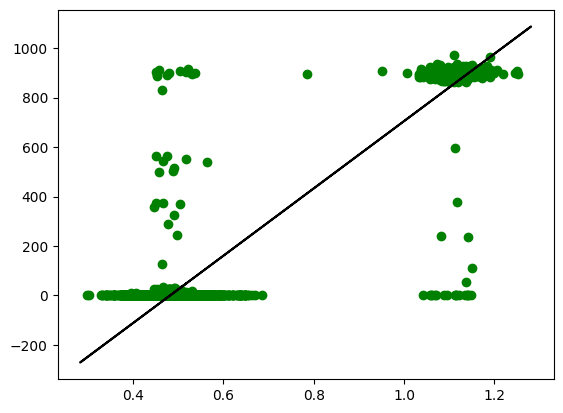

Input: pressure voltage
Predicted: flowrate


In [21]:
df_binary = df[['flowrate', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
y = (y*100).astype(int)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

# regr = LogisticRegression()
# regr = Ridge(alpha=1e-15)
regr = Lasso(alpha=1e-15)
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")